In [1]:
import networkx as nx

In [2]:
def createGraph(vertice):
    nodes = []
    for i in range(vertice):
        nodeName = input(f'Masukkan nama simpul ke {i+1} : ').upper()
        edges = int(input(f'Masukkan jumlah derajat simpul {nodeName} : '))
        count = 0
        while (count<edges):
            nodeList = [nodeName]
            nodeList.append(input(f'Masukkan nama simpul tetangga {nodeName} yang ke-{count+1} : ').upper())
            count += 1
            nodes.append(nodeList)
    return (nodes)

In [3]:
nodes = [['A', 'B'], ['B', 'C'], ['A', 'D'], ['B', 'A'], ['B', 'E'], ['C', 'B'], ['C', 'E'], ['C', 'F'], ['C', 'G'], ['D', 'A'], ['D', 'E'], ['D', 'H'], ['E', 'B'], ['E', 'C'], ['E', 'D'], ['E', 'F'], ['E', 'H'], ['F', 'C'], ['F', 'E'], ['F', 'G'], ['G', 'C'], ['G', 'F'], ['H', 'D'], ['H', 'E']]
print(nodes)  

[['A', 'B'], ['B', 'C'], ['A', 'D'], ['B', 'A'], ['B', 'E'], ['C', 'B'], ['C', 'E'], ['C', 'F'], ['C', 'G'], ['D', 'A'], ['D', 'E'], ['D', 'H'], ['E', 'B'], ['E', 'C'], ['E', 'D'], ['E', 'F'], ['E', 'H'], ['F', 'C'], ['F', 'E'], ['F', 'G'], ['G', 'C'], ['G', 'F'], ['H', 'D'], ['H', 'E']]


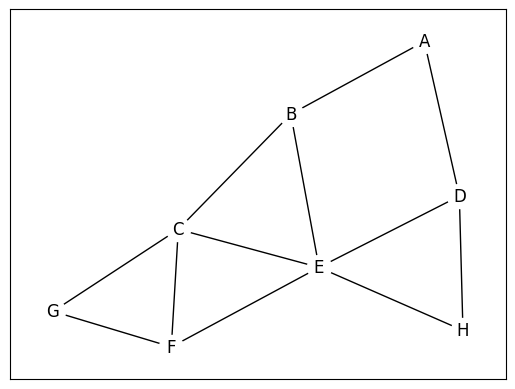

In [4]:
G=nx.Graph() #define G
G.add_edges_from(nodes)

#pos = {'A':[0,1], 'B':[1,1], 'C':[2,1], 'D':[0,0], 'E':[1,0], 'F':[2,0], 'G':[3,0.5], 'H':[0.5,-1]}

nx.draw_networkx(G, node_color = 'w')

In [5]:
def sorting(network):
    nodes = list(network.nodes())
    print(nodes)
    for i in range(len(nodes)-1, 0, -1):
        flagInd = i-1
        index = i
        flag = nodes[flagInd]
        flagNeighbors = list(dict(network[nodes[flagInd]]).keys())
        print(flagNeighbors)
        while (index <= len(nodes)-1 and len(list(dict(network[nodes[index]]).keys())) > len(flagNeighbors)):
            nodes[index-1] = nodes[index]
            index += 1
        nodes[index-1] = flag
    return nodes

In [6]:
def coloring(network):
    colors = ['red', 'green', 'blue', 'lavender', 'yellow', 'gray', 'orange', 'pink']
    colorList = []
    nodes = sorting(network)
    for i in range(len(nodes)):
        nodes_neighbors = list(dict(network[nodes[i]]).keys())
        if len(network.nodes.data()[nodes[i]].keys()) == 0:
            colorTemp = colors.pop()
            colorList.append(colorTemp)
            network.nodes[nodes[i]]['color'] = colorTemp
            forbidden = []
            for j in range(i+1, len(nodes)):
                if len(network.nodes.data()[nodes[j]].keys()) == 0 and nodes[j] not in nodes_neighbors:
                    if len(forbidden) > 0:
                        for data in forbidden:
                            if nodes[j] not in list(dict(network[data]).keys()) and len(network.nodes.data()[nodes[j]].keys()) == 0:
                                network.nodes[nodes[j]]['color'] = colorTemp
                                forbidden.append(nodes[j])
                    else:
                        network.nodes[nodes[j]]['color'] = colorTemp
                        forbidden.append(nodes[j])
    return colorList

In [7]:
def draw(network):
    chromatic_color = coloring(network)
    colors_nodes = [data['color'] for v, data in network.nodes(data=True)]
    pos = {'A':[0,1], 'B':[1,1], 'C':[2,1], 'D':[0,0], 'E':[1,0], 'F':[2,0], 'G':[3,0.5], 'H':[0.5,-1]}
    nx.draw_networkx(network, pos = pos,  node_color=colors_nodes, with_labels=True)
    print(f'Chromatic color is {len(chromatic_color)}')
    print(chromatic_color)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
['C', 'F']
['C', 'E', 'G']
['B', 'C', 'D', 'F', 'H']
['A', 'E', 'H']
['B', 'E', 'F', 'G']
['A', 'C', 'E']
['B', 'D']
Chromatic color is 0
[]


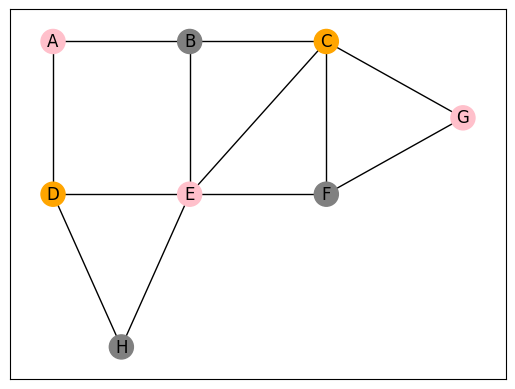

In [10]:
draw(G)